<img src="top.jpg" width=100%/>

# Deteccão de fraudes em cartão de crédito com Machine Learning

## Objetivo
Utilizar o dataset do Kaggle para identificar transações fraudulentas utilizando KNN, DecisionTreeClassifier e Logistic Regression.

## Importação de bibliotecas

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carregamento da base de treino

In [56]:
df_train = pd.read_csv('fraudTrain.csv')

In [57]:
df_train.shape

(1296675, 23)

In [58]:
df_train.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [59]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Não temos dados nulos

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Correlação entre features

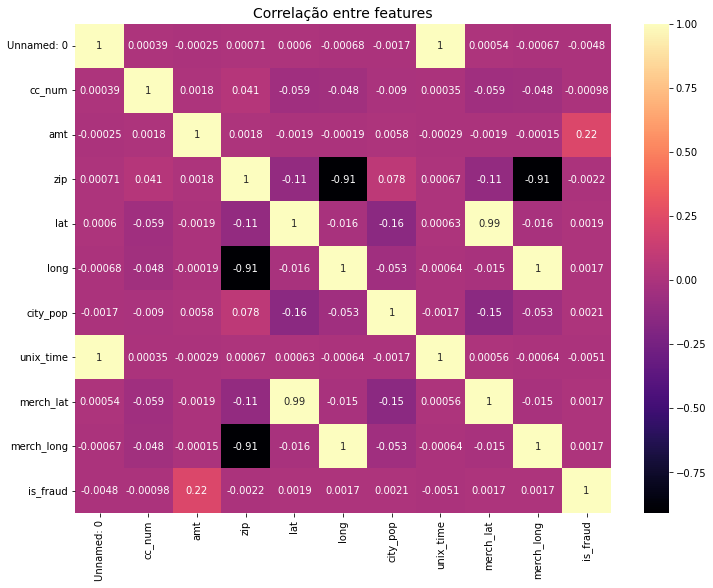

In [61]:
plt.figure(figsize=(12,9))
sns.heatmap(df_train.corr(),annot=True,cmap='magma')
plt.title('Correlação entre features',fontsize=14)
plt.yticks(rotation =0)
plt.show()

### Features que vou utilizar para analisar se uma transação é fraude ou não:
<ul>
<li>job</li>
<li>merch_lat</li>
<li>merch_long</li>
<li>merchant</li>
<li>category</li>
<li>amt</li>
<li>gender</li>
<li>lat</li>
<li>long</li>
<li>trans_date_trans_time</li>
</ul>

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## LabelEncoder de features objeto

In [63]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['job'] = labelencoder.fit_transform(df_train['job'])
df_train['merch_lat'] = labelencoder.fit_transform(df_train['merch_lat'])
df_train['merch_long'] = labelencoder.fit_transform(df_train['merch_long'])
df_train['merchant'] = labelencoder.fit_transform(df_train['merchant'])
df_train['category'] = labelencoder.fit_transform(df_train['category'])
df_train['gender'] = labelencoder.fit_transform(df_train['gender'])
df_train['lat'] = labelencoder.fit_transform(df_train['lat'])
df_train['long'] = labelencoder.fit_transform(df_train['long'])

In [64]:
X_train = df_train[['job','merch_lat','merch_long','merchant','category','amt','gender','lat','long']].values

In [65]:
y_train = df_train['is_fraud'].values

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
cfl = LogisticRegression(random_state=22).fit(X_train, y_train)

In [67]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
cfl.score(X_train, y_train)

0.9937224053829988

## KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [71]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
neigh.score(X_train, y_train)

0.9942900109896466

## Decision Tree

In [73]:
from sklearn import tree

In [74]:
arvore = tree.DecisionTreeClassifier()

In [75]:
arvore = arvore.fit(X_train, y_train)

In [76]:
arvore.score(X_train, y_train)

1.0

## Carregamento da base de teste

In [77]:
teste = pd.read_csv('fraudTest.csv')

In [78]:
teste.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## LabelEncoder de features objeto

In [79]:
teste['job'] = labelencoder.fit_transform(teste['job'])
teste['merch_lat'] = labelencoder.fit_transform(teste['merch_lat'])
teste['merch_long'] = labelencoder.fit_transform(teste['merch_long'])
teste['merchant'] = labelencoder.fit_transform(teste['merchant'])
teste['category'] = labelencoder.fit_transform(teste['category'])
teste['gender'] = labelencoder.fit_transform(teste['gender'])
teste['lat'] = labelencoder.fit_transform(teste['lat'])
teste['long'] = labelencoder.fit_transform(teste['long'])

In [80]:
X_teste = teste[['job','merch_lat','merch_long','merchant','category','amt','gender','lat','long']].values

In [81]:
y_teste = teste['is_fraud']

## Avaliando modelos

### Logistic Regression

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
prev_logistic = cfl.predict(X_teste)
prev_logistic

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
accuracy_score(y_teste, prev_logistic)

0.995026263273345

### KNN

In [85]:
prev_knn = neigh.predict(X_teste)
prev_knn

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
accuracy_score(y_teste, prev_knn)

0.9871031942402545

### Decision Tree

In [87]:
prev_tree = arvore.predict(X_teste)
prev_tree

array([0, 0, 0, ..., 0, 1, 0])

In [88]:
accuracy_score(y_teste, prev_tree)

0.9921723029084843

## Matriz de confusão

In [89]:
from sklearn.metrics import confusion_matrix

In [106]:
con_logistic = confusion_matrix(y_teste, prev_logistic)
con_knn = confusion_matrix(y_teste, prev_knn)
con_tree = confusion_matrix(y_teste, prev_tree)
print(' Logistic Regression: \n',con_logistic)
print(' KNN: \n',con_knn)
print(' Logistic Regression: \n',con_tree)

 Logistic Regression: 
 [[552877    697]
 [  2067     78]]
 KNN: 
 [[548533   5041]
 [  2126     19]]
 Logistic Regression: 
 [[550091   3483]
 [   867   1278]]


## O melhor modelo criado é o Logistic Regression com acurácia de 0,995%.

<img src = "ty.gif" width="100%"/>